# Linear Regression for estimating Annual Premium of Health Insurance


1. Domain Exploration
- understanding business process, customer journey
- explore and analyze sources of data, data journey, data users
- Identify key exceptions in business process, key beleifs from opeerations/shopfloor stakeholders


2. Data Collection and Exploration
- Collect data from different sources: inside and outside
- Build a dataset, define target attribute
- perform high level exploration to assess data quality


3. Data Cleaning
- Handling duplicates, missing values, outliers
- handle formating, units 


4. Feature Engineering
- Feature Extraction: Extract new features from existing: data modelling, Dimensionality reduciton, OLTP to OLAP
- Feature Selection: Select most relevant features
    - Statistical Research: COrrelation ANalysis, ANOVA, Chisquare
    - Data Visualization: Univariate, Bivariate and Multivariate
    

5. Feature Preprocessing: 
- Encoding features
- SCaling features


7. Model Development
- Select algorithm, train model
- Evaluate Model

8. Optimize model
- Tune model, optimize data and get the best model

9. Deploy model
- Deploy model as an inferense pipeline

10. Monitor in production

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Data Collection and Exploration

In [19]:
# load data
df = pd.read_csv("datasets-1/insurance.csv")
df.shape

(1338, 7)

In [20]:
df.head()

,age,Gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:

1. Target column: charges
2. charges is likely to have outliers

## 3. Data Cleaning

In [23]:
# check duplicates
df.duplicated().sum()

1

In [24]:
# drop the duplicated row
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)


(1338, 7)
(1337, 7)


In [25]:
# check for missing values
df.isnull().sum()

age         0
Gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
# check for outliers
df.skew(numeric_only=True)

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

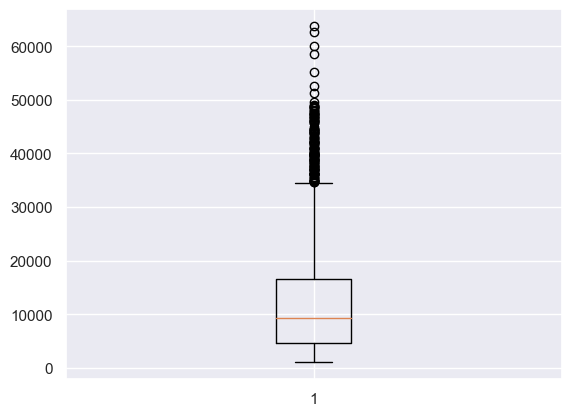

In [27]:
plt.boxplot(df.charges)
plt.show()

In [28]:
# Analyze value at 98 percentile
thresh = df.charges.quantile(0.95)
thresh

41210.04980000002

In [29]:
# replace all values above thresh by max value below thresh
print(df.charges.skew())
df.charges[df.charges>thresh] = df.charges[df.charges<thresh].max()
print(df.charges.skew())

1.5153909108403483
1.3058517533895801


C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_38324\727695898.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.charges[df.charges>thresh] = df.charges[df.charges<thresh].max()
C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_383

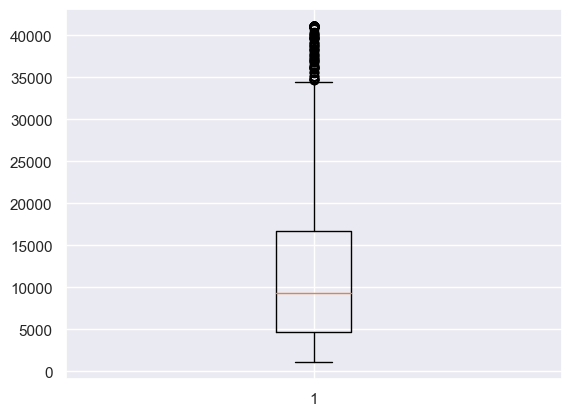

In [31]:
plt.boxplot(df.charges)
plt.show()

In [32]:
q1 = df.charges.quantile(0.25)
q3 = df.charges.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
higher = q3+1.5*iqr

print(lower,higher)

-13120.716174999998 34524.777625


## 4. Feature Engineering
### Feature Selection: Statistical Research

